In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image


In [ ]:
# Load CIFAR-10 dataset
dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True
)

# Select any two images
img1, label1 = dataset[0]
img2, label2 = dataset[1]

print(type(img1))


100%|██████████| 170M/170M [00:03<00:00, 53.5MB/s]


<class 'PIL.Image.Image'>


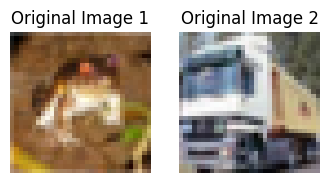

In [ ]:
plt.figure(figsize=(4,2))

plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("Original Image 1")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img2)
plt.title("Original Image 2")
plt.axis("off")

plt.show()


In [ ]:
transform_pipeline = transforms.Compose([
    transforms.Resize((64, 64)),      # 1. Resize
    transforms.Grayscale(num_output_channels=3),  # 2. Grayscale
    transforms.RandomHorizontalFlip(p=1.0),        # 3. Flip
    transforms.RandomRotation(30),    # 4. Rotation
    transforms.ToTensor(),             # Convert to tensor
    transforms.Normalize(mean=[0.5,0.5,0.5],
                         std=[0.5,0.5,0.5])         # 5. Normalize
])


In [ ]:
img1_t = transform_pipeline(img1)
img2_t = transform_pipeline(img2)

print("Image 1 shape:", img1_t.shape)
print("Image 1 pixel range:", img1_t.min().item(), img1_t.max().item())

print("Image 2 shape:", img2_t.shape)
print("Image 2 pixel range:", img2_t.min().item(), img2_t.max().item())


Image 1 shape: torch.Size([3, 64, 64])
Image 1 pixel range: -1.0 0.9450980424880981
Image 2 shape: torch.Size([3, 64, 64])
Image 2 pixel range: -1.0 0.9764705896377563


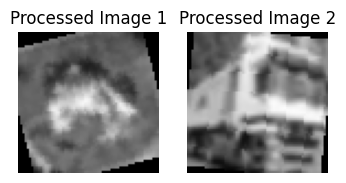

In [ ]:
def show_tensor_image(tensor, title):
    img = tensor.permute(1,2,0)   # C,H,W → H,W,C
    img = (img * 0.5) + 0.5       # unnormalize
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

plt.figure(figsize=(4,2))

plt.subplot(1,2,1)
show_tensor_image(img1_t, "Processed Image 1")

plt.subplot(1,2,2)
show_tensor_image(img2_t, "Processed Image 2")

plt.show()


In [ ]:
batch_tensor = torch.cat([img1_t.unsqueeze(0), img2_t.unsqueeze(0)], dim=0)

print("Final tensor shape:", batch_tensor.shape)


Final tensor shape: torch.Size([2, 3, 64, 64])
